**Análisis univariado - LoL e-sports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [22]:
url_teams = 'https://raw.githubusercontent.com/cporras/lol-esports/main/Data/df_teams.csv'
df = pd.read_csv(url_teams)

In [16]:
df.head()

,gameid,split,playoffs,date,game,playerid,side,position,player,team,champion,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,totalgold,earnedgold,earned gpm,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,6909-9183-1-1,Spring,0,2021-01-09 09:22:04,1,100,Blue,team,NaN,Top Esports,NaN,2050,0,3,9,6,3,9,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.0878,0.3512,1.0,2.0,2.0,1.0,NaN,NaN,0.0,0.0,1.0,1.0,3.0,6.0,1.0,1.0,NaN,NaN,0.0,1.0,63315.0,1853.1220,2559.0146,1990.8585,101.0,2.9561,83.0,2.4293,40.0,54617,32329.0,946.2146,53550.0,1230.0,987.0,243.0,162.0,13.0,36.0000,16177.0,19640.0,380.0,15445.0,19565.0,360.0,732.0,75.0,20.0,1.0,1.0,0.0,0.0,0.0,1.0,24815.0,31121.0,608.0,23864.0,31228.0,590.0,951.0,-107.0,18.0,1.0,1.0,0.0,0.0,0.0,1.0
1,6909-9183-1-1,Spring,0,2021-01-09 09:22:04,1,200,Red,team,NaN,Suning,NaN,2050,1,9,3,28,9,3,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.2634,0.3512,0.0,2.0,2.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,6.0,3.0,0.0,0.0,NaN,NaN,1.0,0.0,58406.0,1709.4439,2940.4390,2526.6146,161.0,4.7122,61.0,1.7854,46.0,60520,38232.0,1118.9854,53575.0,1215.0,947.0,268.0,199.0,12.0,35.5610,15445.0,19565.0,360.0,16177.0,19640.0,380.0,-732.0,-75.0,-20.0,0.0,0.0,1.0,1.0,1.0,0.0,23864.0,31228.0,590.0,24815.0,31121.0,608.0,-951.0,107.0,-18.0,0.0,0.0,1.0,1.0,1.0,0.0
2,6909-9184-2-2,Spring,0,2021-01-09 10:16:20,2,100,Blue,team,NaN,Top Esports,NaN,2241,0,16,27,27,16,27,2.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.4284,1.1513,0.0,3.0,2.0,1.0,NaN,NaN,1.0,2.0,0.0,1.0,6.0,7.0,1.0,1.0,NaN,NaN,0.0,2.0,84516.0,2262.8112,3790.4150,3101.6600,121.0,3.2396,73.0,1.9545,42.0,69692,45456.0,1217.0281,65536.0,1243.0,957.0,286.0,181.0,15.0,33.2798,16752.0,20020.0,361.0,15250.0,18856.0,321.0,1502.0,1164.0,40.0,2.0,2.0,1.0,1.0,1.0,2.0,27355.0,32158.0,560.0,25210.0,32578.0,516.0,2145.0,-420.0,44.0,5.0,6.0,6.0,6.0,9.0,5.0
3,6909-9184-2-2,Spring,0,2021-01-09 10:16:20,2,200,Red,team,NaN,Suning,NaN,2241,1,27,17,59,27,17,6.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,0.7229,1.1513,1.0,2.0,3.0,0.0,NaN,NaN,0.0,0.0,2.0,0.0,7.0,6.0,0.0,0.0,NaN,NaN,2.0,0.0,97504.0,2610.5489,3192.6372,2521.8206,155.0,4.1499,55.0,1.4726,49.0,70269,46033.0,1232.4766,66558.0,1191.0,939.0,252.0,195.0,10.0,31.8876,15250.0,18856.0,321.0,16752.0,20020.0,361.0,-1502.0,-1164.0,-40.0,1.0,1.0,2.0,2.0,2.0,1.0,25210.0,32578.0,516.0,27355.0,32158.0,560.0,-2145.0,420.0,-44.0,6.0,9.0,5.0,5.0,6.0,6.0
4,6910-9189-1-1,Spring,0,2021-01-09 11:30:25,1,100,Blue,team,NaN,Oh My God,NaN,1887,0,4,15,9,4,15,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.1272,0.6041,1.0,1.0,4.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,3.0,9.0,0.0,0.0,NaN,NaN,0.0,1.0,37351.0,1187.6312,2777.9332,1912.7822,104.0,3.3068,47.0,1.4944,32.0,51145,30520.0,970.4293,49750.0,1066.0,848.0,218.0,163.0,7.0,33.8951,15842.0,18405.0,322.0,15812.0,18712.0,333.0,30.0,-307.0,-11.0,2.0,3.0,2.0,2.0,4.0,2.0,24131.0,29284.0,527.0,24588.0,30502.0,543.0,-457.0,-1218.0,-16.0,2.0,3.0,3.0,3.0,5.0,2.0


In [23]:
#Datos que no tienen sentido al analizar los datos agregados del equipo
df.drop(['position','player','champion','firstbloodkill','firstbloodassist','firstbloodvictim','turretplates','opp_turretplates','heralds','opp_heralds'],axis=1,inplace=True)
df['quadrakills'] = df['quadrakills'].fillna(0) 
df['pentakills'] = df['pentakills'].fillna(0)
df.head()

,gameid,split,playoffs,date,game,playerid,side,team,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,team kpm,ckpm,firstdragon,dragons,opp_dragons,firstherald,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,inhibitors,opp_inhibitors,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,totalgold,earnedgold,earned gpm,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,6909-9183-1-1,Spring,0,2021-01-09 09:22:04,1,100,Blue,Top Esports,2050,0,3,9,6,3,9,0.0,0.0,0.0,0.0,1.0,0.0878,0.3512,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1.0,3.0,6.0,1.0,1.0,0.0,1.0,63315.0,1853.1220,2559.0146,1990.8585,101.0,2.9561,83.0,2.4293,40.0,54617,32329.0,946.2146,53550.0,1230.0,987.0,243.0,162.0,13.0,36.0000,16177.0,19640.0,380.0,15445.0,19565.0,360.0,732.0,75.0,20.0,1.0,1.0,0.0,0.0,0.0,1.0,24815.0,31121.0,608.0,23864.0,31228.0,590.0,951.0,-107.0,18.0,1.0,1.0,0.0,0.0,0.0,1.0
1,6909-9183-1-1,Spring,0,2021-01-09 09:22:04,1,200,Red,Suning,2050,1,9,3,28,9,3,1.0,0.0,0.0,0.0,0.0,0.2634,0.3512,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,6.0,3.0,0.0,0.0,1.0,0.0,58406.0,1709.4439,2940.4390,2526.6146,161.0,4.7122,61.0,1.7854,46.0,60520,38232.0,1118.9854,53575.0,1215.0,947.0,268.0,199.0,12.0,35.5610,15445.0,19565.0,360.0,16177.0,19640.0,380.0,-732.0,-75.0,-20.0,0.0,0.0,1.0,1.0,1.0,0.0,23864.0,31228.0,590.0,24815.0,31121.0,608.0,-951.0,107.0,-18.0,0.0,0.0,1.0,1.0,1.0,0.0
2,6909-9184-2-2,Spring,0,2021-01-09 10:16:20,2,100,Blue,Top Esports,2241,0,16,27,27,16,27,2.0,0.0,0.0,0.0,0.0,0.4284,1.1513,0.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0,6.0,7.0,1.0,1.0,0.0,2.0,84516.0,2262.8112,3790.4150,3101.6600,121.0,3.2396,73.0,1.9545,42.0,69692,45456.0,1217.0281,65536.0,1243.0,957.0,286.0,181.0,15.0,33.2798,16752.0,20020.0,361.0,15250.0,18856.0,321.0,1502.0,1164.0,40.0,2.0,2.0,1.0,1.0,1.0,2.0,27355.0,32158.0,560.0,25210.0,32578.0,516.0,2145.0,-420.0,44.0,5.0,6.0,6.0,6.0,9.0,5.0
3,6909-9184-2-2,Spring,0,2021-01-09 10:16:20,2,200,Red,Suning,2241,1,27,17,59,27,17,6.0,1.0,0.0,0.0,1.0,0.7229,1.1513,1.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,7.0,6.0,0.0,0.0,2.0,0.0,97504.0,2610.5489,3192.6372,2521.8206,155.0,4.1499,55.0,1.4726,49.0,70269,46033.0,1232.4766,66558.0,1191.0,939.0,252.0,195.0,10.0,31.8876,15250.0,18856.0,321.0,16752.0,20020.0,361.0,-1502.0,-1164.0,-40.0,1.0,1.0,2.0,2.0,2.0,1.0,25210.0,32578.0,516.0,27355.0,32158.0,560.0,-2145.0,420.0,-44.0,6.0,9.0,5.0,5.0,6.0,6.0
4,6910-9189-1-1,Spring,0,2021-01-09 11:30:25,1,100,Blue,Oh My God,1887,0,4,15,9,4,15,0.0,0.0,0.0,0.0,1.0,0.1272,0.6041,1.0,1.0,4.0,1.0,0.0,0.0,1.0,0.0,3.0,9.0,0.0,0.0,0.0,1.0,37351.0,1187.6312,2777.9332,1912.7822,104.0,3.3068,47.0,1.4944,32.0,51145,30520.0,970.4293,49750.0,1066.0,848.0,218.0,163.0,7.0,33.8951,15842.0,18405.0,322.0,15812.0,18712.0,333.0,30.0,-307.0,-11.0,2.0,3.0,2.0,2.0,4.0,2.0,24131.0,29284.0,527.0,24588.0,30502.0,543.0,-457.0,-1218.0,-16.0,2.0,3.0,3.0,3.0,5.0,2.0


In [24]:
df.shape

(682, 85)

In [26]:
df.dtypes

gameid                       object
split                        object
playoffs                      int64
date                         object
game                          int64
playerid                      int64
side                         object
team                         object
gamelength                    int64
result                        int64
kills                         int64
deaths                        int64
assists                       int64
teamkills                     int64
teamdeaths                    int64
doublekills                 float64
triplekills                 float64
quadrakills                 float64
pentakills                  float64
firstblood                  float64
team kpm                    float64
ckpm                        float64
firstdragon                 float64
dragons                     float64
opp_dragons                 float64
firstherald                 float64
firstbaron                  float64
barons                      

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameid                    682 non-null    object 
 1   split                     682 non-null    object 
 2   playoffs                  682 non-null    int64  
 3   date                      682 non-null    object 
 4   game                      682 non-null    int64  
 5   playerid                  682 non-null    int64  
 6   side                      682 non-null    object 
 7   team                      682 non-null    object 
 8   gamelength                682 non-null    int64  
 9   result                    682 non-null    int64  
 10  kills                     682 non-null    int64  
 11  deaths                    682 non-null    int64  
 12  assists                   682 non-null    int64  
 13  teamkills                 682 non-null    int64  
 14  teamdeaths

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
playoffs,682.0,0.131965,0.338701,0.0000,0.000000,0.00000,0.000000,1.0000
game,682.0,1.765396,0.809691,1.0000,1.000000,2.00000,2.000000,5.0000
playerid,682.0,150.000000,50.036697,100.0000,100.000000,150.00000,200.000000,200.0000
gamelength,682.0,1829.087977,293.225905,1040.0000,1615.000000,1807.00000,2030.000000,2628.0000
result,682.0,0.500000,0.500367,0.0000,0.000000,0.50000,1.000000,1.0000
kills,682.0,13.019062,6.840403,0.0000,7.000000,13.00000,18.000000,33.0000
deaths,682.0,13.036657,6.844195,0.0000,7.000000,13.00000,18.000000,33.0000
assists,682.0,29.997067,16.941204,0.0000,16.000000,30.00000,43.000000,91.0000
teamkills,682.0,13.019062,6.840403,0.0000,7.000000,13.00000,18.000000,33.0000
teamdeaths,682.0,13.036657,6.844195,0.0000,7.000000,13.00000,18.000000,33.0000


**Gráfico de barras con la función value_counts() sobre la columna 'team'**

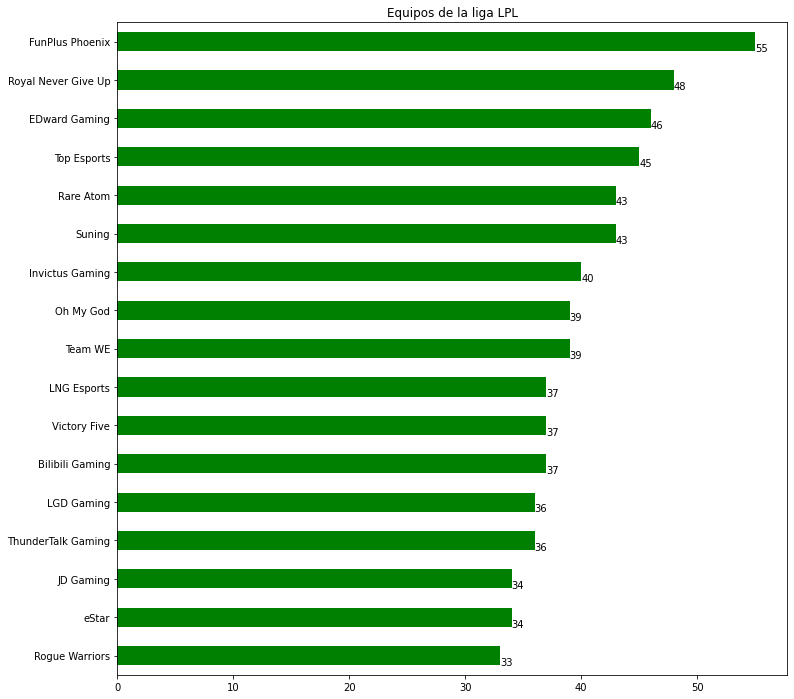

In [28]:
plt.figure(figsize=(12,12))
ax = df['team'].value_counts().sort_values().plot.barh(color='green')
for p in ax.patches:
     ax.annotate(str(p.get_width()), (p.get_width(),p.get_y()))
ax.set_title('Partidas jugadas por Equipos de la liga LPL')
plt.show()

**Gráfico de líneas de la variable: 'kills'**, utilizando la función value_counts() y ordenamimiento por intermedio de: sort_index()

Se grafica el conteo de  la cantidad de 'kills' por equipo por cada partida, se espera una distribución similar a la normal

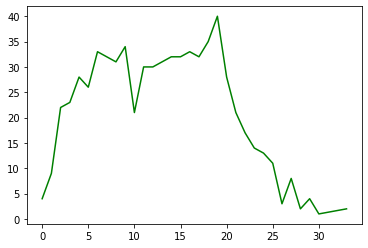

In [29]:
df['kills'].value_counts().sort_index().plot.line(color='green')

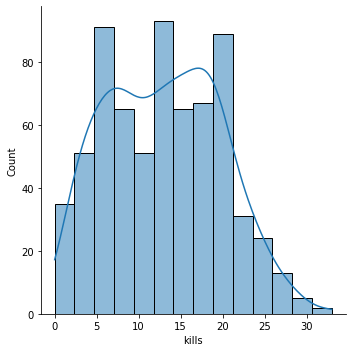

In [30]:
sns.displot(df['kills'],kde=True)

**Histograma de la variable: 'totalgold'** 

Es el oro obtenido en total por el equipo en una partida

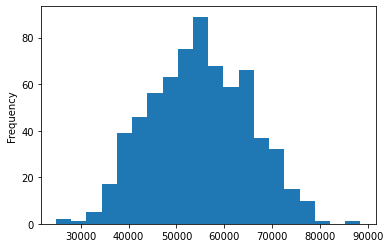

In [31]:
df['totalgold'].plot.hist(bins=20)

**Distribucion de Frecuencias**

Calcular la frecuencia absoluta, la absoluta acumulada, la frecuencia relativa y relativa acumulada para la variable: **dragons**

In [32]:
df['dragons'].value_counts()

3.0    165
1.0    152
2.0    152
4.0    111
0.0     84
5.0     17
6.0      1
Name: dragons, dtype: int64

In [33]:
def tabla_frec(variable):
  frec_abs = variable.value_counts().sort_index().rename('frec_abs')
  frec_abs_acum = variable.value_counts().sort_index().cumsum().rename('frec_abs_acum')
  frec_rel = variable.value_counts(normalize=True).sort_index().rename('frec_rel')
  frec_rel_acum = variable.value_counts(normalize=True).sort_index().cumsum().rename('frec_rel_acum')
  
  df = pd.concat([frec_abs,frec_abs_acum,frec_rel,frec_rel_acum],axis=1)
  return df

In [34]:
tabla_frec(df['dragons'])

,frec_abs,frec_abs_acum,frec_rel,frec_rel_acum
0.0,84,84,0.123167,0.123167
1.0,152,236,0.222874,0.346041
2.0,152,388,0.222874,0.568915
3.0,165,553,0.241935,0.810850
4.0,111,664,0.162757,0.973607
5.0,17,681,0.024927,0.998534
6.0,1,682,0.001466,1.000000


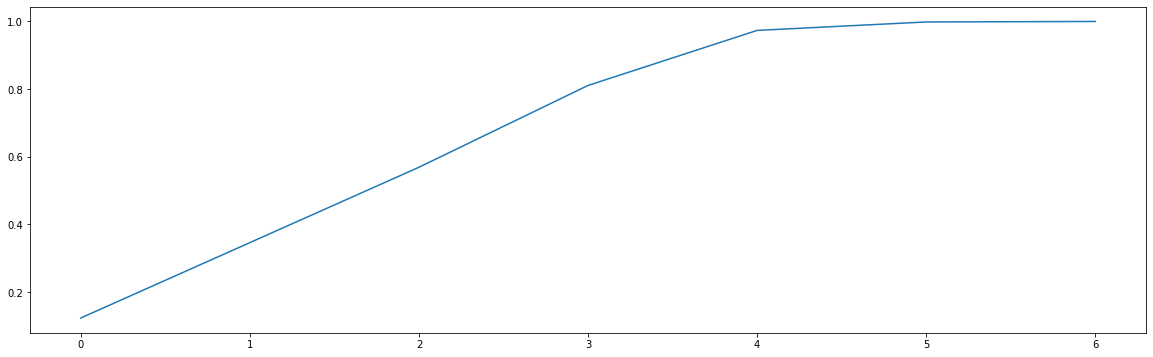

In [35]:
plt.figure(figsize=(20,6))
tabla_frec(df['dragons'])['frec_rel_acum'].plot()
#Nos da una idea de la cantidad de dragones por partida. La aparición de dragones en el mapa depende del tiempo de la partida y la rapidez con la que los equipos logran conquistarlos

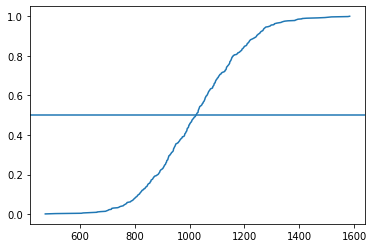

In [36]:
tabla_frec(df['total cs'])['frec_rel_acum'].plot()
plt.axhline(0.5)
#Frecuencia de la puntuación de minions 

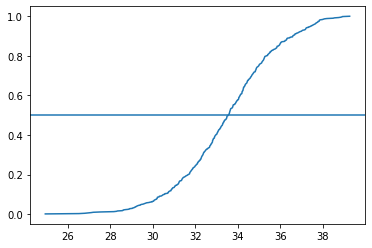

In [37]:
tabla_frec(df['cspm'])['frec_rel_acum'].plot()
plt.axhline(0.5)
#Relacionada a la anterior, es la puntuación de minions por minuto

**Analisis kills por equipo**

In [38]:
df.teamkills.describe()

count    682.000000
mean      13.019062
std        6.840403
min        0.000000
25%        7.000000
50%       13.000000
75%       18.000000
max       33.000000
Name: teamkills, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


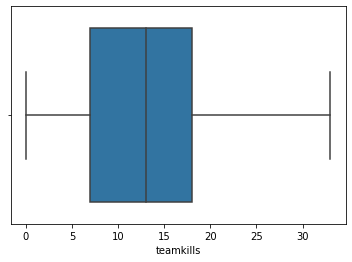

In [39]:
from seaborn import boxplot
boxplot(df.teamkills, orient="v")
#La mayoría de partidas se hubican entre las 7 y 19 kills por equipo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


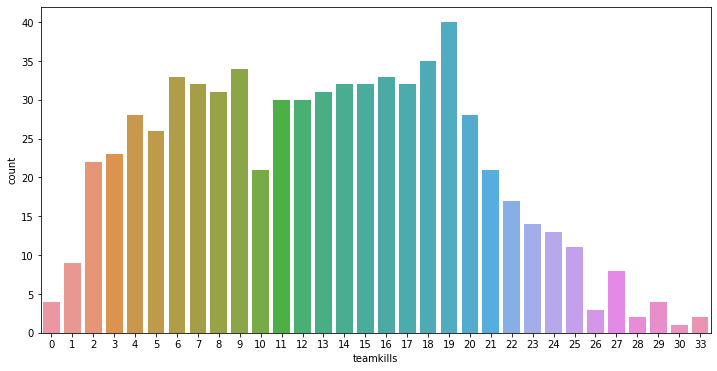

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(df['teamkills'])


**Analisis por longitud de partida**

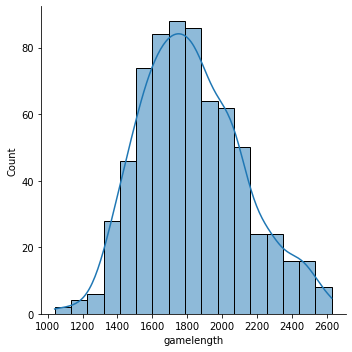

In [41]:
sns.displot(df['gamelength'],kde=True)

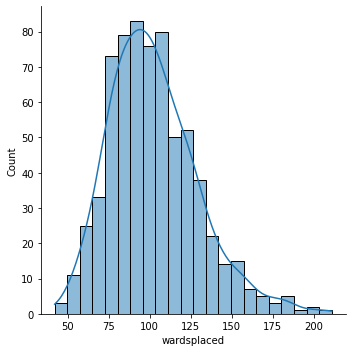

In [42]:
sns.displot(df['wardsplaced'],kde=True)

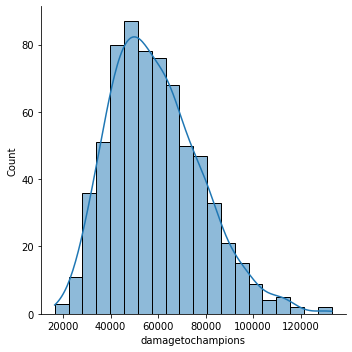

In [43]:
sns.displot(df['damagetochampions'],kde=True)


La mayoría de datos, si no todos, tienen distribuciones normales